In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from datetime import datetime as dt

import pdb

In [12]:
selector = ['UCB', 'SGV_UCB', 'MUTUAL_INFO']
selector = ['SGV_UCB']
selectors = selector
directory = 'results/'
model = 'linear'
user = 'perfect'
fake_func = 'linear'
hyper = 'no'

colors = ['#000000', '#F0E442', '#CC79A7', '#D55E00', '#56B4E9', '#0072B2','#E69F00']

colors_dict = {'ABS_UCB': '#CC79A7',
               
               'ACQ_RHO': '#009E73',
               'ACQ_LL': '#E69F00',
               'ACQ_EPIC': '#56B4E9',
               'ACQ_SPEAR': '#FF0000',
               'SW_ACQ_RHO': '#009E73',
               'SW_ACQ_LL': '#E69F00',
               'SW_ACQ_EPIC': '#56B4E9',
               'SW_ACQ_SPEAR': '#000000',
               'SW_UCB_SPEAR': '#000000',
               'SW_UCB_EPIC': '#56B4E9',
               'SW_UCB_LL': '#E69F00',
               'SW_UCB_RHO': '#009E73',
               'ABS_ACQ_RHO': '#009E73',
               'ABS_ACQ_LL': '#E69F00',
               'ABS_ACQ_EPIC': '#56B4E9',
               'ABS_ACQ_SPEAR': '#000000',
               
               'MUTUAL_INFO': '#CC79A7',
               'RANDOM': '#F0E442',
               
               'SW_ALT_SPEAR': '#009E73',
               'SW_MIX_SPEAR': '#D55E00',
               'SW_MIX_PEAK_SPEAR': '#117733',
               'SW_MIX_PEAK2_SPEAR': '#332288',
               'SW_MIX_PEAK3_SPEAR': '#D55E00',
               'SW_MIX_DEC_SPEAR': '#56B4E9'}


pap_colors_dict = {
               'SGV_UCB': '#000000',
               'UCB': '#000000',
               'ABS_UCB': '#000000',
               'MUTUAL_INFO': '#CC79A7',
               'RANDOM': '#56B4E9',
               'ABS_RANDOM': '#56B4E9',
               'BAYES_INFO_GAIN_PROBIT': '#D55E00',
               'BAYES_INFO_GAIN_999': '#56B4E9',
               'ACQ_RHO': '#0072B2',
               'ACQ_LL': '#E69F00',
               'ACQ_EPIC': '#332288',
               'ACQ_SP': '#117733',
               'ACQ_SPEAR': '#009E73',
               'SW_ACQ_RHO': '#0072B2',
               'SW_ACQ_LL': '#E69F00',
               'SW_ACQ_EPIC': '#332288',
               'SW_ACQ_SP': '#117733',
               'SW_ACQ_SPEAR': '#009E73',
               'ABS_ACQ_RHO': '#0072B2',
               'ABS_ACQ_LL': '#E69F00',
               'ABS_ACQ_EPIC': '#000000',
               'ABS_ACQ_SP': '#000000',
               'ABS_ACQ_SPEAR': '#009E73',
               'SW_UCB_RHO' : '#0072B2',
               'SW_UCB_LL' : '#E69F00',
               'SW_UCB_SPEAR' : '#009E73',
               'SW_FIXED_RHO' : '#0072B2',
               'SW_FIXED_LL' : '#E69F00',
               'SW_FIXED_SPEAR' : '#009E73',
               'SW_CHECK_RHO' : '#0072B2',
               'SW_CHECK_LL' : '#E69F00',
               'SW_CHECK_SPEAR' : '#009E73'
}

pap_style_sel = {
               'SGV_UCB': '-',
               'UCB': '--',
               'ABS_UCB': ':',
               'MUTUAL_INFO': '--',
               'RANDOM': '--',
               'ABS_RANDOM': ':',
               'BAYES_INFO_GAIN_PROBIT': '--',
               'BAYES_INFO_GAIN_999': '--',
               'ACQ_RHO': '--',
               'ACQ_LL': '--',
               'ACQ_EPIC': '--',
               'ACQ_SP': '--',
               'ACQ_SPEAR': '--',
               'SW_ACQ_RHO': '-',
               'SW_ACQ_LL': '-',
               'SW_ACQ_EPIC': '-',
               'SW_ACQ_SP': '-',
               'SW_ACQ_SPEAR': '-',
               'ABS_ACQ_RHO': ':',
               'ABS_ACQ_LL': ':',
               'ABS_ACQ_EPIC': ':',
               'ABS_ACQ_SP': ':',
               'ABS_ACQ_SPEAR': ':',
               'SW_UCB_RHO' : 'dashdot',
               'SW_UCB_LL' : 'dashdot',
               'SW_UCB_SPEAR' : 'dashdot',
               'SW_FIXED_RHO' : (0, (3, 1, 3, 1, 5, 5)),
               'SW_FIXED_LL' : (0, (3, 1, 3, 1, 5, 5)),
               'SW_FIXED_SPEAR' : (0, (3, 1, 3, 1, 5, 5)),
               'SW_CHECK_RHO' : (0, (7, 2, 2, 2, 7, 2)),
               'SW_CHECK_LL' : (0, (7, 2, 2, 2, 7, 2)),
               'SW_CHECK_SPEAR' : (0, (7, 2, 2, 2, 7, 2))
}



colors2_dict = {'ACQ_RHO': '#000000',
                'SW_ACQ_RHO': '#D55E00',
                'ABS_UCB': '#F0E442',}

sig_color_dict = {'0.1': '#000000',
                  '0.2': '#009E73',
                  '0.5': '#CC79A7',
                  '1.0': '#0072B2', 
                  '10.0':'#D55E00'}


alpha_color_dict = {'0.01': '#DDCC77',
                    '0.1': '#E69F00',
                    '0.2': '#56B4E9',
                    '0.25': '#009E73',
                    '0.3': '#D55E00',
                    '0.4': '#CC79A7',
                    '0.5': '#000000',
                    '0.6': '#332288',
                    '0.7': '#117733',
                    '0.75': '#F0E442',
                    '0.8': '#44AA99',
                    '0.9': '#0072B2',
                    '0.99': '#88CCEE'
                   }

'0.14', '0.2', '0.25', '0.02', '0.08', '0.12'

alpha_style_dict = {'0.01': '-.',
                    '0.02': (0, (5,5,1,1,2,2)),
                    '0.07': ':',
                    '0.08': (0, (7,7)),
                    '0.12': '-.',
                    '0.14': (0, (3,3,1,1,2,2)),
                    '0.15': (0,(7,3,3,1,1,)),
                    '0.1': '--',
                    '0.2': '--',
                    '0.25': ':',
                    '0.3': '#D55E00',
                    '0.4': ':',
                    '0.5': '-',
                    '0.6': '-.',
                    '0.7': '#117733',
                    '0.75': (0,(7,7,7,7)),
                    '0.8': '#44AA99',
                    '0.9': '#0072B2',
                    '0.99': '#88CCEE',
                    '1.0': (0, (5,5,1,1,2,2,3,3))
                   }

p_color_dict = {'0.01': '#D55E00',
                '0.1': '#56B4E9',
                '0.65': '#E69F00', 
                '0.7': '#009E73',
                '0.8': '#000000',
                '0.85': '#F0E442',
                '0.9': '#0072B2',
                '0.95': '#CC79A7'
               }



v_style_dict = {'10.0': '-',
                '60.0': '--',
                '80.0': '--',
                '160.0': ':',
                '2000.0' : '-.',
                '50000.0': (0, (7, 7, 7, 7, 7, 7)),
                '1.3': '-.',
                '300.0': ':',
                '0.5': (0, (7, 7, 7, 7, 7, 7)),
                '3.0': (0, (5,2,5,1,1,1,1,1)),
                '15.0': (0, (7,2,7,2)),
                '20.0': (0,(7,1,7,1,7,1,7,1)),
                '30.0': (0,(2,7,7,2,3,2,5)),
                '40.0': (0,(5,1,1,1,1,1,1)),
                '50.0': (0,(9,5,9,1,1,1)),
                '100.0': (0,(11,1,11,2))}

v_color_dict = {'1.0': '#000000',
                '5.0': '#E69F00',
                '10.0': '#117733',
                '30.0': '#56B4E9', 
                '50.0': '#009E73',
                '60.0': '#F0E442',
                '120.0': '#0072B2',
                '200.0': '#D55E00',
                '2000.0': '#CC79A7',
                '50000.0': '#332288'}

comp_type_c_dict = {'stable': '#000000',
                    'sampled': '#E69F00',}


#'-','--',':','-.'
sel_style_dict = {'ABS_UCB': '-',
                'SW_UCB_RHO': '--',
                'SW_UCB_SPEAR': ':',
                'SW_UCB_LL' : '-.',
                'ACQ_SPEAR': (0, (7, 7, 7, 7, 7, 7))}

#sig_style_dict = {'0.1': '-',
#                '1.0': '--',
#                '10.0': ':'}

rbf_style_dict = {  '0.1': (0, (3, 1, 3, 1, 5, 5)),
                    '0.4': ':',
                    '0.6': (0, (5, 1, 5, 1, 1, 1)),
                    '0.8': '-.',
                    '1.0': (0, (3, 1, 1, 1, 1, 1)),
                    '1.2': '--',
                    '1.5': '-',
                    '10.0': (0, (7, 7, 7, 7, 7, 7))}

sig_style_dict = {  '0.1': '--',
                    '0.5': (0, (7,7,7,7,7,7)),
                    '0.01': (0, (7,1,1,1,1,1)),
                    '0.2' : '-',
                    '0.3': '-.',
                    '1.0': ':', 
                    '1.5': '-.',
                    '2.0': (0, (3, 1, 1, 1, 1, 1)),
                    '5.0': (0, (7,7,7,7,7,7)),
                    '10.0': (0, (3, 1, 3, 1, 5, 5))}

kmed_style_dict = {'True': '--',
                    'False': '-',
                    'uni': ':', 
                    'downhull': '-.',
                    'medrand': (0, (3, 1, 1, 1, 1, 1))}

model_style_dict = {'gp': '-',
                    'linear': '--'}




def selector_text_f(selector):
    selector_text = ''
    if selector == 'SGV_UCB':
        selector_text = 'SGV-UCB'
    elif selector == 'UCB':
        selector_text = 'Pair UCB'
    elif selector == 'ABS_UCB':
        selector_text = 'Abs. UCB'
    elif selector == 'MUTUAL_INFO':
        selector_text = 'Pair Mutual Information'
    elif selector == 'RANDOM':
        selector_text = 'Pair Random'
    elif selector == 'ABS_RANDOM':
        selector_text = 'Abs. Random'
    elif selector == 'BAYES_INFO_GAIN_PROBIT':
        selector_text = 'Reward Optimization'
    elif selector == 'ACQ_RHO':
        selector_text = 'Pair  Acq.-rho'
    elif selector == 'SW_ACQ_RHO':
        selector_text = 'Mix. Acq.-rho'
    elif selector == 'SW_UCB_RHO':
        selector_text = 'Mix. UCB-RHO'
    elif selector == 'SW_FIXED_RHO':
        selector_text = 'Mix. Fixed time Switch UCB-RHO'
    elif selector == 'ABS_ACQ_RHO':
        selector_text = 'Abs. acquisition-rho'
    elif selector == 'SW_CHECK_RHO':
        selector_text = 'Chk. Acq.-rho'
    elif selector == 'SW_ACQ_LL':
        selector_text = 'Mix. acquitition-ll'
    elif selector == 'SW_UCB_LL':
        selector_text = 'Mix. UCB-LL'
    elif selector == 'SW_FIXED_LL':
        selector_text = 'Mix. Fixed time Switch UCB-LL'
    elif selector == 'ACQ_LL':
        selector_text = 'Pair Acquisition loglikelihood'
    elif selector == 'ABS_ACQ_LL':
        selector_text = 'Abs. Acquisition-ll'
    elif selector == 'SW_CHECK_LL':
        selector_text = 'Chk. Acq.-LL'
    elif selector == 'ACQ_EPIC' or selector == 'SW_ACQ_EPIC':
        selector_text = 'Acquisition EPICish'
    elif selector == 'ACQ_SP':
        selector_text = 'Acquisition Spearman old'
    elif selector == 'ACQ_SPEAR':
        selector_text = 'Pair Acq-Spear'
    elif selector == 'SW_ACQ_SPEAR':
        selector_text = 'Mix. Acquisition Spearman'
    elif selector == 'SW_UCB_SPEAR':
        selector_text = 'Mix. UCB-Spear'
    elif selector == 'ABS_ACQ_SPEAR':
        selector_text = 'Abs. Acq.-Spear'
    elif selector == 'SW_CHECK_SPEAR':
        selector_text = 'Chk. Acq.-Spear'
    elif selector == 'SW_FIXED_SPEAR':
        selector_text = 'Mix. Fixed time Switch UCB-SPEAR'
    elif selector == 'SW_DEC_SPEAR':
        selector_text = 'Mix. Decision switch UCB-SPEAR'
    elif selector == 'SW_ALT_SPEAR':
        selector_text = 'Alternating Spearman'
    elif selector == 'SW_MIX_SPEAR':
        selector_text = 'Mix. Mixture Sel. Spearman'
    elif selector == 'SW_MIX_PEAK_SPEAR':
        selector_text = 'Mix. Mixed peaky Spearman'
    elif selector == 'SW_MIX_PEAK2_SPEAR':
        selector_text = 'Mix. Mixed peaky 2 Spearman'
    elif selector == 'SW_MIX_PEAK3_SPEAR':
        selector_text = 'Mix. Mixed peaky 3 Spearman'
    elif selector == 'SW_MIX_DEC_SPEAR':
        selector_text = 'Mix. Mixed decision'
    else:
        print('Unknown selector: ' + selector)
    
    return selector_text


In [13]:
def filter_by_time(names, after=None, before=None):
    fmt_str = '%Y-%m-%d_%H-%M-%S'
    
    if after is not None:
        after_d = dt.strptime(after, fmt_str)
        
        if before is not None:
            # only keep values between before and after
            
            before_d = dt.strptime(before, fmt_str)
            filtered = [n for n in names if dt.strptime(n[-34:-15], fmt_str) > after_d and dt.strptime(n[-34:-15], fmt_str) < before_d]
        else:
            # only keep values after
            filtered = [n for n in names if dt.strptime(n[-34:-15], fmt_str) > after_d]
    else:
        if before is not None:
            # only keep names before
            before_d = dt.strptime(before, fmt_str)
            filtered = [n for n in names if dt.strptime(n[-34:-15], fmt_str) < before_d]
        else:
            # just return everything
            filtered = names
    return filtered
        
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-09_13-22-45/train_data.npz'], '2024-08-07_00-25-47'))
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz'], '2024-08-07_00-25-47'))
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz'], before='2024-08-07_00-25-47'))
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz'], before='2024-08-07_00-25-47', after='2024-07-07_00-25-47'))

['asdagads-adsfa-dsf-adsfa-awfe-2024-08-09_13-22-45/train_data.npz']
[]
['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz']
['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz']


In [28]:
tests = [{'fake_func': 'min'     , 'pabs_str': '0.95', 'v': '300.0', 'sigpair': '1.0'},
         {'fake_func': 'min'     , 'pabs_str': '0.8' , 'v': '10.0' , 'sigpair': '0.1'},
         {'fake_func': 'min'     , 'pabs_str': '0.7' , 'v': '0.5'  , 'sigpair': '0.1'},
         {'fake_func': 'logistic', 'pabs_str': '0.95', 'v': '300.0', 'sigpair': '1.0'},
         {'fake_func': 'logistic', 'pabs_str': '0.8' , 'v': '10.0' , 'sigpair': '0.3'},
         {'fake_func': 'logistic', 'pabs_str': '0.7' , 'v': '10.0' , 'sigpair': '0.2'},
         {'fake_func': 'linear'  , 'pabs_str': '0.95', 'v': '300.0', 'sigpair': '1.0'},
         {'fake_func': 'linear'  , 'pabs_str': '0.8' , 'v': '60.0' , 'sigpair': '1.0'},
         {'fake_func': 'linear'  , 'pabs_str': '0.7' , 'v': '10.0'  , 'sigpair': '0.2'}]

#tests = [tests[0], tests[1]]

In [100]:




def calc_aoc_tests(tests, selectors):
    after_time = '2024-11-21_18-00-00'
    before_time = '2025-10-15_16-00-00'

    
    
    aocs = []
    aocs_mean = []
    aocs_std = []
    
    for test in tests:
        print('\n\n')
        
        # Particular variables to test
        fake_func = test['fake_func']
        pabs_str = test['pabs_str']
        v = test['v']
        sigpair = test['sigpair']



        # General variables that need to be set
        pareto='False'
        model = 'gp'
        user = 'human_choice'
        select = 'switch'
        hyper = 'no'
        sigabs='1.0'
        rbfl = '1.2'
        comp_type = 'stable'
        query_size = '2'
        rbfsig = '1.0'
        kmed = 'medrand'
        ppair_str = '0.95'
        alpha = '0.5'
        fake_alpha = '0.5'

        show_avg_sel=False

        leg_txt = []
        color_idx = 0
        line_style_idx = 0
        
        aoc_selectors = []
        aocs_sel_mean = []
        aocs_sel_std = []
        
        for selector in selectors:
            kmed_str = '_kmed_'+str(kmed)
            if selector == 'ABS_RANDOM':
                glob_selector = 'RANDOM'
                select = 'rating'
            elif selector == 'ABS_UCB':
                glob_selector = 'UCB'
                select = 'rating'
            else:
                glob_selector = selector
                select = 'switch'

            v_sel = v

            if selector == 'ABS_UCB':
                sigpair = '0.2'
            if selector == 'ACQ_SPEAR':
                sigpair = '0.2'
                v_sel = '0.5'
            
            


            sub_str_alpha = '_falp_' + fake_alpha +'_'+hyper+'_v_'+v_sel+'_sigabs_'+sigabs+'_sigpair_'+sigpair+ '_alpha_' + alpha
            if (selector == 'ABS_UCB' or selector == 'ACQ_SPEAR') and alpha == '0.5':
                sub_str_alpha = '_falp_' + fake_alpha +'_'+hyper+'_v_'+v_sel+'_sigabs_'+sigabs+'_sigpair_'+sigpair+ '_alpha_' + '0.5'



            glob_check = directory+'AT_'+glob_selector+'_model_'+model+'_'+select+'_'+comp_type+'_user_'+user+query_size+'_fake_'+fake_func+'_pareto_'+pareto+kmed_str+'_ppair_' + ppair_str + '_pabs_'+ pabs_str + sub_str_alpha +'_rbfl_'+rbfl+'_rbfsig_'+\
                            rbfsig+'_env*/train_data.npz'

            after_time_this = after_time

            if selector == 'ABS_UCB':
                after_time_this = '2024-11-19_01-00-00'

            print('\t'+glob_check)
            files_pre_time = glob(glob_check)
            #print(files)
            files = filter_by_time(files_pre_time, before=before_time, after=after_time_this)

            #print(files)
            if len(files) == 0:
                print('NOT FOUND ANY FILES')
                print('\n\n')
                print(files_pre_time)



            if len(files) > 0:
                score_diffs = np.empty((0,21))
                avg_selections = np.empty((0, 21))
                for file in files:
                    data_file = np.load(file)
                    #print(file)

                    # read in score diff
                    score_diff = np.mean(data_file['score_diff'], axis=(2,))

                    score_diffs = np.append(score_diffs, score_diff, axis=0)

                    if 'query_type_is_abs' in data_file:
                        avg_selection = data_file['query_type_is_abs']
                        #avg_selection = data_file['query_is_correct']
                        avg_selections = np.append(avg_selections, avg_selection, axis=0)

                print(score_diffs.shape)

                itr_to_show = 21
                print('length of files')
                print(len(files))
            if len(files) == 0:
                aoc = np.zeros((3,))
            else:
                aoc = np.sum(score_diffs, axis=1)
                
            aoc_selectors.append(aoc)
            aocs_sel_mean.append(np.mean(aoc))
            aocs_sel_std.append(np.std(aoc) / np.sqrt(len(aoc)))
        # end aoc
        aocs.append(aoc_selectors)
        aocs_mean.append(aocs_sel_mean)
        aocs_std.append(aocs_sel_std)

    return aocs, np.array(aocs_mean), np.array(aocs_std)
                
                





In [101]:
tests = [{'fake_func': 'min'     , 'pabs_str': '0.95', 'v': '300.0', 'sigpair': '1.0'},
         {'fake_func': 'min'     , 'pabs_str': '0.8' , 'v': '10.0' , 'sigpair': '0.1'},
         {'fake_func': 'min'     , 'pabs_str': '0.7' , 'v': '10.0'  , 'sigpair': '0.1'},
         {'fake_func': 'logistic', 'pabs_str': '0.95', 'v': '300.0', 'sigpair': '1.0'},
         {'fake_func': 'logistic', 'pabs_str': '0.8' , 'v': '10.0' , 'sigpair': '0.3'},
         {'fake_func': 'logistic', 'pabs_str': '0.7' , 'v': '10.0' , 'sigpair': '0.2'},
         {'fake_func': 'linear'  , 'pabs_str': '0.95', 'v': '300.0', 'sigpair': '1.0'},
         {'fake_func': 'linear'  , 'pabs_str': '0.8' , 'v': '60.0' , 'sigpair': '1.0'},
         {'fake_func': 'linear'  , 'pabs_str': '0.7' , 'v': '10.0'  , 'sigpair': '0.2'}]

selectors = ['SW_UCB_SPEAR', 'ABS_UCB', 'ACQ_SPEAR']

aocs, aocs_mean, aocs_std = calc_aoc_tests(tests, selectors)




	results/AT_SW_UCB_SPEAR_model_gp_switch_stable_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_300.0_sigabs_1.0_sigpair_1.0_alpha_0.5_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
(400, 21)
length of files
20
	results/AT_UCB_model_gp_rating_stable_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_300.0_sigabs_1.0_sigpair_0.2_alpha_0.5_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
(200, 21)
length of files
10
	results/AT_ACQ_SPEAR_model_gp_switch_stable_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_0.5_sigabs_1.0_sigpair_0.2_alpha_0.5_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
(200, 21)
length of files
10



	results/AT_SW_UCB_SPEAR_model_gp_switch_stable_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.8_falp_0.5_no_v_10.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
(2400, 21)
length of files
30
	results/AT_UCB_model_gp_rati

In [103]:
# results/AT_ACQ_SPEAR_model_gp_switch_stable_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.7_falp_0.5_no_v_0.5_sigabs_1.0_sigpair_0.2_alpha_0.5_rbfl_1.2_rbfsig_1.0_env4_2024-11-24_01-54-27/train_data.npz
print(aocs_mean)

[[0.65788683 0.65840742 0.99869082]
 [0.9827778  1.03598419 0.96031046]
 [0.98176608 1.36016622 0.        ]
 [0.2392676  0.21999633 0.34187519]
 [0.32505279 0.33780313 0.35729769]
 [0.34597858 0.43581727 0.37198944]
 [0.66321459 0.67597107 1.07831269]
 [0.90615557 0.94918166 1.04530645]
 [1.05830579 1.32576782 1.08703621]]


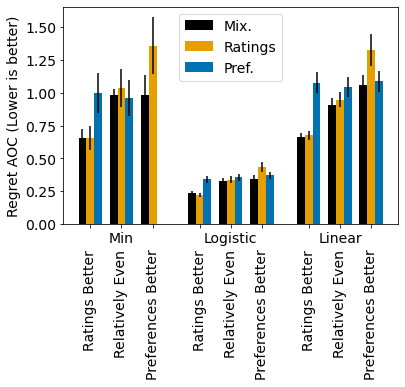

In [112]:
#fig, ax = plt.subplots(layout='tight')
ax = plt.gca()

offset = 0.1

xs = []
xticks = []

selectors = ['Mix.', 'Ratings', 'Pref.']
functions = ['Min', 'Logistic', 'Linear']
p_abs_str = ['Ratings Better    ', 'Relatively Even    ', 'Preferences Better    ']

colors = ['#000000', '#E69F00', '#0072B2']

xticks_str = []
xticks_major = []
for i_pabs in range(3):
    for i_func in range(3):
        for i_selector in range(len(aocs_mean[0])):
            x = i_selector * offset + i_pabs * (4*offset) + i_func * (4 * offset * 3 + 2*offset)
                                
            xs.append(x)
            
            idx = i_pabs + i_func*3
            ax.bar(x, aocs_mean[idx][i_selector], width=0.1, yerr=aocs_std[idx][i_selector]*1.96, 
                       label=selectors[i_selector], color=colors[i_selector])
        
        xticks.append(1 * offset + i_pabs * (4*offset) + i_func * (4 * offset * 3 + 2*offset))
        xticks_str.append(p_abs_str[i_pabs])
    
    xticks_major += [1 * offset + 1 * (4*offset) + i_pabs * (4 * offset * 3 + 2*offset)]

y_text = -0.14
for i in range(3):    
    ax.text(xticks_major[i], y_text, functions[i], ha='center')


ax.set_xticks(xticks, xticks_str, rotation=90)
ax.set_ylabel('Regret AOC (Lower is better)')
plt.legend(selectors)
plt.show()

In [63]:
import scipy.stats as stats

def calculate_statistics(glob1, glob2):

    after_time = '2024-11-21_18-00-00'
    after_time_ucb = '2024-11-19_18-00-00'
    before_time = '2025-10-15_16-00-00'

    files1 = glob(glob1)
    files1 = filter_by_time(files1, before=before_time, after=after_time_ucb)

    files2 = glob(glob2)
    files2 = filter_by_time(files2, before=before_time, after=after_time)

    #print('len(files1) = ' + str(len(files1)))
    #print('len(files2) = ' + str(len(files2)))

    #print(files1)
    #print(files2)

    regrets1 = np.empty((0,))
    regrets2 = np.empty((0,))

    for i in range(0,len(files1)):
        data_file = np.load(files1[i])

        regret1 = np.mean(data_file['score_diff'], axis=2)
        regret_mean1 = np.mean(regret1, axis=1)
        regrets1 = np.append(regrets1, regret_mean1, axis=0)

        data_file2 = np.load(files2[i])

        regret2 = np.mean(data_file2['score_diff'], axis=2)
        regret_mean2 = np.mean(regret2, axis=1)
        regrets2 = np.append(regrets2, regret_mean2, axis=0)

    print(np.mean(regrets1))    
    print(np.mean(regrets2))

    r1 = regrets1
    r2 = regrets2
    for i in range(30):
        regrets1 = np.append(regrets1, r1, axis=0)
        regrets2 = np.append(regrets2, r2, axis=0)
    
    res = stats.ttest_ind(regrets1, regrets2, alternative='greater')
    
    c0 = regrets1
    c1 = regrets2
    
    cohens_d = (np.mean(c0) - np.mean(c1)) / (np.sqrt((np.std(c0) ** 2 + np.std(c1) ** 2) / 2))
    
    print(res)
    print(cohens_d)
    
    
glob1 = 'results/AT_UCB_model_gp_rating_stable_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_300.0_sigabs_1.0_sigpair_0.2_alpha_0.5_rbfl_1.2_rbfsig_1.0_env*/train_data.npz'
glob2 = 'results/AT_SW_UCB_SPEAR_model_gp_switch_stable_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_300.0_sigabs_1.0_sigpair_1.0_alpha_0.5_rbfl_1.2_rbfsig_1.0_env*/train_data.npz'

glob8_ucb = 'results/AT_UCB_model_gp_rating_stable_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.8_falp_0.5_no_v_10.0_sigabs_1.0_sigpair_0.2_alpha_0.5_rbfl_1.2_rbfsig_1.0_env*/train_data.npz'
glob8_sw = 'results/AT_SW_UCB_SPEAR_model_gp_switch_stable_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.8_falp_0.5_no_v_10.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env*/train_data.npz'


calculate_statistics(glob1, glob2)
print('\n')
calculate_statistics(glob8_ucb, glob8_sw)

0.03135273421481849
0.03037786976634439
TtestResult(statistic=1.7554141934312475, pvalue=0.03960659003293661, df=12398.0)
0.031530712541269657


0.04933258057950727
0.044835990420265565
TtestResult(statistic=5.21832427204676, pvalue=9.173169836794277e-08, df=12398.0)
0.09373142998657252
